# Introduction aux réseaux de neurones : Préambule au projet
Matériel de cours rédigé par Pascal Germain, 2018
************

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Nous vous fournissons quelques fonctions sous la forme d'un module `projetutils`. Vous êtes encouragés à [lire le code source](projetutils.py) et de vous en inspirer pour réaliser votre projet. Chaque fonction est accompagnée d'une courte description en commentaires vous renseignant sur son dessein.

In [2]:
import projetutils as pr

## Préparation des données

La fonction `charger_cifar` permet de charger les données.

In [3]:
pr.charger_cifar?

Nous vous suggérons de travailler seulement avec les trois premières classes.

In [4]:
repertoire_cifar = 'cifar/'
classes_cifar = [0, 1, 2]

data_x, data_y = pr.charger_cifar(repertoire_cifar, classes_cifar)

0 : 1005 images
1 : 974 images
2 : 1032 images
Total : 3011 images


Séparons aléatoirement les données en un ensemble d'apprentissage et un ensemble de test de tailles équivalentes (à l'aide des outils de *scikit-learn*).
Nous vous conseillons d'utiliser le même partitionnement des données pour votre projet.

In [5]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.5, random_state=42)
print('train_x:', train_x.shape)
print('test_x:', test_x.shape)
print('train_y:', train_y.shape)
print('test_y:', test_y.shape)

train_x: (1505, 3072)
test_x: (1506, 3072)
train_y: (1505,)
test_y: (1506,)


Affichons un échantillon de 40 images sélectionnées aléatoirement dans l'ensemble d'apprentissage. Pour ce faire, nous vous fournissons une fonction `afficher_grille_cifar`.

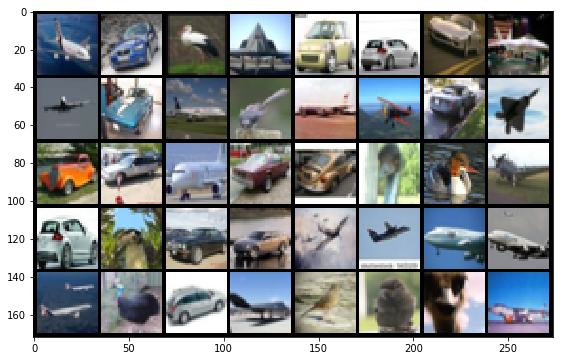

In [6]:
indices_aleatoires = np.random.randint(len(train_y), size=40)
pr.afficher_grille_cifar(train_x[indices_aleatoires])

## Apprentissage à l'aide d'un réseau de neurones *pleinement connecté*

Similairement au TD2, nous utiliserons une classe `ReseauClassifGenerique` pour apprendre notre réseau de neurones, que nous avons bonifié pour permettre d'effectuer la procédure du «early stopping». Pour ce faire, vous devez spécifier les paramètres `fraction_validation` et `patience`. Consultez les commentaires de la classe `ReseauClassifGenerique` pour plus de détails.

In [7]:
pr.ReseauClassifGenerique?

Un objet `ReseauClassifGenerique` doit être instancié à l'aide d'un paramètre `architecture`. Le module `projetutils` contient un exemple d'architecture pleinement connectée à une couche cachée.

In [8]:
pr.UneArchiPleinementConnectee?

En combinant les deux classes mentionnées ci-haut, nous pouvons exécuter l'algorithme de descente en gradient. Lors de l'apprentissage, nous affichons la valeur de la fonction objectif pour chaque époque. Si on recourt au «early stopping» (c'est le cas dans l'exemple qui suit), on affiche aussi la précision calculée sur l'ensemble de validation. 

In [9]:
# Créons une architecture prenant une image en entrée (sous la forme d'un vecteur de 3*32*32 éléments),
# possédant 3 sorties (correspondant aux classes «oiseau», «auto», «avion») et 50 neurones sur la couche cachée.
archi_pc = pr.UneArchiPleinementConnectee(nb_entrees=3*32*32, nb_sorties=3, nb_neurones_cachees=50)

# Initialisons le réseau de neurones.
reseau_pc = pr.ReseauClassifGenerique(archi_pc, eta=0.01, alpha=0.1, nb_epoques=500, taille_batch=32, 
                           fraction_validation=.1, patience=20)

# Exécutons l'optimisation
reseau_pc.fit(train_x, train_y)

[1] 1.05666 | validation: 0.506667 ---> meilleur modèle à ce jour (max_t=21)
[2] 0.97917 | validation: 0.520000 ---> meilleur modèle à ce jour (max_t=22)
[3] 0.91755 | validation: 0.553333 ---> meilleur modèle à ce jour (max_t=23)
[4] 0.87007 | validation: 0.533333
[5] 0.83491 | validation: 0.513333
[6] 0.80878 | validation: 0.540000
[7] 0.78903 | validation: 0.533333
[8] 0.77333 | validation: 0.546667
[9] 0.76027 | validation: 0.560000 ---> meilleur modèle à ce jour (max_t=29)
[10] 0.74885 | validation: 0.560000
[11] 0.73908 | validation: 0.560000
[12] 0.72989 | validation: 0.560000
[13] 0.72092 | validation: 0.560000
[14] 0.71260 | validation: 0.566667 ---> meilleur modèle à ce jour (max_t=34)
[15] 0.70412 | validation: 0.566667
[16] 0.69602 | validation: 0.560000
[17] 0.68831 | validation: 0.573333 ---> meilleur modèle à ce jour (max_t=37)
[18] 0.68088 | validation: 0.573333
[19] 0.67358 | validation: 0.566667
[20] 0.66671 | validation: 0.566667
[21] 0.65984 | validation: 0.566667
[

Vérifions l'acuité du réseau de neurones pleinement connecté sur l'ensemble test. 

In [10]:
train_pred = reseau_pc.predict(train_x)
test_pred = reseau_pc.predict(test_x)
print('Précision train:', accuracy_score(train_y, train_pred) )
print('Précision test :', accuracy_score(test_y, test_pred))

Précision train: 0.8332225913621263
Précision test : 0.7297476759628154


La précision sur l'ensemble test devrait se situer entre 70% et 74%, selon les aléas de la descente en gradient stochastique. Vous pouvez répéter l'expérience en exécutant les deux dernières cellules de code.

## Diagnostique visuel de la descente en gradient 

La classe `ReseauClassifGenerique` conserve un l'historique des valeurs de la fonction objectif et des valeurs de précision en validation calculées au fil des époques. Nous pouvons ainsi afficher un graphique du comportement de la descente en gradient et éventuellement repérer des problèmes (par exemple, un paramètre `eta` trop élevé induira une oscillation dans la valeur objectif).

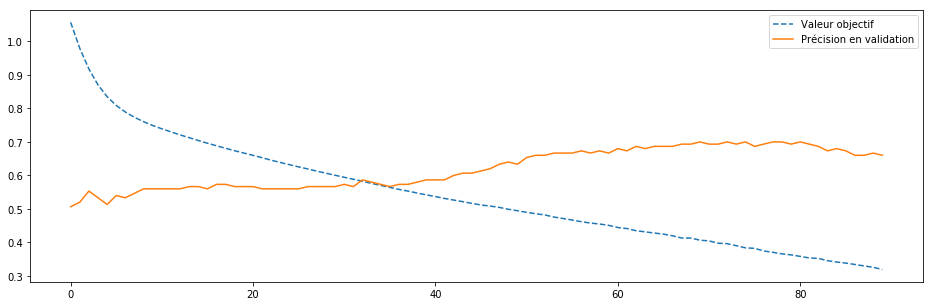

In [11]:
plt.figure(figsize=(16,5))
plt.plot(reseau_pc.liste_objectif, '--', label='Valeur objectif')
plt.plot(reseau_pc.liste_validation, label='Précision en validation')
plt.legend();

## Calculer le nombre de paramètres du modèle

Dans l'énoncé du projet, nous vous demandons de tenir compte du nombre de paramètres que votre réseau de neurones doit optimiser. Nous vous fournissons aussi une fonction `compter_parametres` qui parcourt les structures de données de pyTorch pour obtenir ce nombre de paramètres, et ainsi valider votre calcul.

In [12]:
pr.compter_parametres(archi_pc.parametres())

153803

**Notez bien:** Votre rapport ne doit pas seulement indiquer le total du nombre de paramètres à optimiser, mais détailler la répartition des paramètres pour chaque couche, en tenant compte de l'architecture de votre réseau.

Ainsi, l'architecture pleinement connectée représentée par l'objet `archi_pc` contient $153\, 803$ paramètres, ce qui correspond au total des:
* Couche cachée: $[3\,072 \mbox{ entrées}] \times [50 \mbox{ neurones}] + [50 \mbox{ valeurs de biais}] = 153\,650 \mbox{ paramètres}.$
* Couche de sortie: $[50 \mbox{ entrées}] \times [3 \mbox{ neurones}] + [3 \mbox{ valeurs de biais}] = 153 \mbox{ paramètres}.$

In [13]:
(3*32*32)*50+50 + 50*3+3  

153803